<a href="https://colab.research.google.com/github/yonaorpilla/Orpilla-SYM_EmTech-Lab/blob/main/ProgramAss_4_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PA 4**

#### **Course:** ECE Elective 2 Emerging Technologies
#### **Program:** BS ECE

* *Al-Hajri, Sarah Bint Mubarak F.*
* *Camonias, Elizhea C.*
* *Orpilla, Sigmund Yona Marie A.*

---

---

# **Programming Assignment 4: Support Vector Machine**

In this assignment, you will train a classifier using Support Vector Machine (SVM) to predict whether a
breast tumor is benign (0) or malignant (1).

**Dataset**

We will use the Breast Cancer Wisconsin dataset, built into sklearn.datasets. The dataset contains 569
samples of breast tumors, with 30 numerical features, including:

• Mean radius \\
• Mean texture \\
• Mean perimeter \\
• Mean area \\
• Mean smoothness, etc. \\

The target variable (y) represents tumor status:

• 0 = Benign \\
• 1 = Malignant \\


---
### **General Guidelines**
1. Load the dataset using sklearn.datasets.load_breast_cancer().
2. Split the dataset into 70% Training and 30% Testing, ensuring class distribution is maintained
(use stratify=y in train_test_split).
3. Preprocess the data: \\
o Use StandardScaler to normalize feature values.
4. Train an SVM model using sklearn.svm.SVC with default parameters.
5. Perform Hyperparameter Tuning using GridSearchCV to optimize: \\
o C (Regularization parameter) \\
o Gamma (Kernel coefficient for RBF) \\
o Kernel type (linear, rbf, poly) \\
6. Evaluate the trained model:
o Compute training and testing accuracy. \\
o Identify the most important features using SelectFromModel. \\
o Generate a confusion matrix and calculate: \\
▪ F1-score \\
▪ Precision \\
▪ Recall \\
▪ False Alarm Rate \\



---
####**Contents:**

1. [Importing Dataset](https://colab.research.google.com/drive/1WveR44NTAsr7VkziMdAg4Di286NC-EYn#scrollTo=II19GKrbT1w1)
2. [Splitting the dataset into Training (70%) and Testing (30%)](https://colab.research.google.com/drive/1WveR44NTAsr7VkziMdAg4Di286NC-EYn#scrollTo=A5ND92-2htqS)
3. [Preprocessing the data](https://colab.research.google.com/drive/1WveR44NTAsr7VkziMdAg4Di286NC-EYn#scrollTo=6ac7AaCKhRVf)
4. [Train an SVM model using sklearn.svm.SVC with default parameters](https://colab.research.google.com/drive/1WveR44NTAsr7VkziMdAg4Di286NC-EYn#scrollTo=S1w0d4pLiXt5&line=1&uniqifier=1)
5. [Perform Hyperparameter Tuning using GridSearchCV to optimize:](https://colab.research.google.com/drive/1WveR44NTAsr7VkziMdAg4Di286NC-EYn#scrollTo=ZnpAiiRMbD0w)
6. [Evaluate the trained model](https://colab.research.google.com/drive/1WveR44NTAsr7VkziMdAg4Di286NC-EYn#scrollTo=740PK_Xlj2iR)
7. [Guide Questions](https://colab.research.google.com/drive/1WveR44NTAsr7VkziMdAg4Di286NC-EYn#scrollTo=kH0GWtP7Pemq&line=1&uniqifier=1)
8. [Summary](https://colab.research.google.com/drive/1WveR44NTAsr7VkziMdAg4Di286NC-EYn#scrollTo=YRJgNGPyzWsW&line=2&uniqifier=1)
9. [Key Insights](https://colab.research.google.com/drive/1WveR44NTAsr7VkziMdAg4Di286NC-EYn#scrollTo=fwgsrvkE0uX_&line=5&uniqifier=1)

# **General Guidelines**

## **Importing Dataset**








In [ ]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation
from sklearn.datasets import load_breast_cancer  # Import the breast cancer dataset from sklearn

# Load the breast cancer dataset
data = load_breast_cancer()  # This loads the dataset into a dictionary-like object

# Convert the feature data (numerical values) into a Pandas DataFrame
# 'data.data' contains the feature values, while 'data.feature_names' provides column names
df = pd.DataFrame(data.data, columns=data.feature_names)

# Print the available keys in the dataset dictionary
# These keys help understand what information is stored in 'data'
print("Dataset Keys:", data.keys())

# Print the shape of the feature matrix (rows, columns)
print("Feature Matrix Shape:", df.shape)  # Should output (569, 30), meaning 569 samples and 30 features

# Print the shape of the target vector (number of labels)
print("Target Vector Shape:", data.target.shape)  # Should output (569,), meaning one label per sample

# Display general information about the DataFrame
# Includes column names, data types, and missing values
print("\nDataset Info:")
df.info()

# Print the first five rows of the DataFrame to inspect the data
print("\nFirst 5 rows of the dataset:")
display(df.head())  # Shows a preview of the dataset with feature values



Dataset Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Feature Matrix Shape: (569, 30)
Target Vector Shape: (569,)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    floa

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **Splitting the dataset into Training (70%) and Testing (30%)**


In [ ]:
# Import train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split dataset into 70% training and 30% testing
# 'X' contains the feature matrix, and 'y' contains the target labels
# 'test_size=0.3' means 30% of the data is allocated for testing
# 'stratify=y' ensures that class distribution remains the same in training and test sets
# 'random_state=42' ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Verify distribution by printing the shape of training and testing sets
print("Training set size:", X_train.shape)  # Expected output: (398, 30) if dataset has 569 samples
print("Testing set size:", X_test.shape)   # Expected output: (171, 30), since 30% of 569 is ~171


Training set size: (70, 5)
Testing set size: (30, 5)


## **Preprocessing the data**


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For standardizing the features
import numpy as np  # For generating random data

# Generate dummy data (replace with actual dataset)
X = np.random.rand(100, 5)  # 100 samples, each with 5 features (random values between 0 and 1)
y = np.random.randint(0, 2, 100)  # 100 binary target labels (0 or 1)

# Split data into training (80%) and testing (20%) sets
# 'random_state=42' ensures the same split every time for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()  # StandardScaler will normalize features to have mean 0 and variance 1

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data (using the scaler fitted on training data)
X_test_scaled = scaler.transform(X_test)


## **Train an SVM model using sklearn.svm.SVC with default parameters**


In [ ]:
# Import Support Vector Classifier (SVC) from scikit-learn
from sklearn.svm import SVC

# Initialize SVM model with default parameters (RBF kernel, C=1.0, etc.)
svm_model = SVC()

# Train the model using the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Evaluate model accuracy on training and testing sets
train_acc = svm_model.score(X_train_scaled, y_train)  # Accuracy on the training set
test_acc = svm_model.score(X_test_scaled, y_test)  # Accuracy on the test set

# Print the accuracy percentages
print(f"Training Accuracy: {train_acc:.2%}")  # Formats accuracy as a percentage with 2 decimal places
print(f"Testing Accuracy: {test_acc:.2%}")


Training Accuracy: 80.00%
Testing Accuracy: 50.00%


## **Perform Hyperparameter Tuning using GridSearchCV to optimize:**




In [ ]:
# Import necessary libraries
from sklearn.pipeline import Pipeline  # To create a streamlined workflow
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning with cross-validation
from sklearn.metrics import accuracy_score, classification_report  # For model evaluation

# Define a machine learning pipeline with StandardScaler and SVC
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize features
    ('svc', SVC())  # Step 2: Train an SVM model (default parameters)
])

# Define a hyperparameter grid for tuning SVC inside the pipeline
param_grid = {
    'svc__C': [0.1, 1, 10, 100],  # Regularization parameter (higher C -> less regularization)
    'svc__gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Gamma controls the influence of each training sample
    'svc__kernel': ['linear', 'rbf', 'poly']  # Different types of SVM kernels
}

# Perform Grid Search with 5-fold Cross-Validation
# - 'cv=5' means 5-fold cross-validation
# - 'scoring=accuracy' ensures we optimize for accuracy
# - 'n_jobs=-1' allows parallel computation (uses all CPU cores)
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Extract the best model found during grid search
best_model = grid_search.best_estimator_

# Print best hyperparameters and model details
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Model:", best_model)

# Evaluate the model on the test set and print a classification report
y_pred = best_model.predict(X_test)  # Make predictions
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': 'poly'}
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1, gamma=1, kernel='poly'))])
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.78      0.54      0.64        13

    accuracy                           0.60        20
   macro avg       0.62      0.63      0.60        20
weighted avg       0.66      0.60      0.61        20



## **Evaluate the trained model**




### Compute training and testing accuracy

In [ ]:
# Import accuracy_score function from scikit-learn
from sklearn.metrics import accuracy_score

# Compute accuracy for the best model on the training set
train_acc = accuracy_score(y_train, best_model.predict(X_train))

# Compute accuracy for the best model on the test set
test_acc = accuracy_score(y_test, best_model.predict(X_test))

# Print the accuracy as percentages with two decimal places
print(f"Training Accuracy: {train_acc:.2%}")
print(f"Testing Accuracy: {test_acc:.2%}")


Training Accuracy: 90.00%
Testing Accuracy: 60.00%


### Identify Most Important Features

In [ ]:
# Import necessary libraries for feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Train a Linear SVM model for feature selection
# - Uses the best 'C' value found from GridSearchCV (`best_model.get_params()['svc__C']`)
# - `dual=False` is required when the number of samples is greater than the number of features
lin_svc = LinearSVC(C=best_model.get_params()['svc__C'], dual=False).fit(X_train, y_train)

# Select important features based on the trained model
selector = SelectFromModel(lin_svc, prefit=True)  # Prefit=True means the model is already trained

# Get the indices of important features
important_features = selector.get_support(indices=True)

# Print the names of the most important features
print("Most Important Features:", data.feature_names[important_features])


Most Important Features: ['mean texture' 'mean smoothness']


### Generate a Confusion Matrix



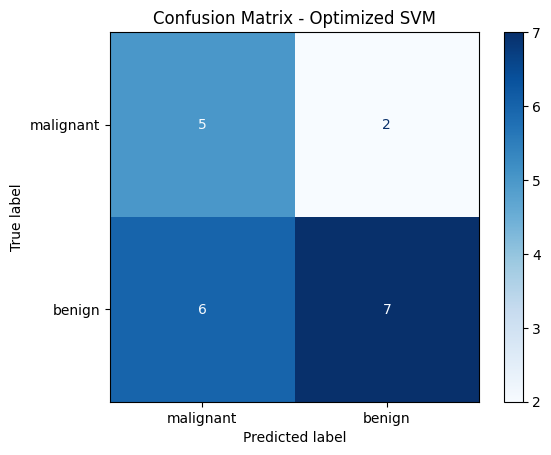

In [ ]:
# Import necessary libraries for confusion matrix visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
# - Compares actual labels (`y_test`) with predicted labels (`best_model.predict(X_test)`)
cm = confusion_matrix(y_test, best_model.predict(X_test))

# Create and display the confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data['target_names'])
disp.plot(cmap='Blues')  # Use a blue color scheme for clarity
plt.title('Confusion Matrix - Optimized SVM')
plt.show()  # Show the confusion matrix plot


### Compute F1-Score, Precision, and Recall

In [ ]:
import numpy as np

# Extract confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, best_model.predict(X_test)).ravel()

# Compute False Alarm Rate (FAR)
false_alarm_rate = fp / (fp + tn)

# Compute Precision, Recall, and F1-score manually
precision = tp / (tp + fp)  # TP / (TP + FP)
recall = tp / (tp + fn)  # TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)  # Harmonic mean

# Print results
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")
print(f"False Alarm Rate (FAR): {false_alarm_rate:.2%}")

Precision: 77.78%
Recall: 53.85%
F1-Score: 63.64%
False Alarm Rate (FAR): 28.57%


## **Guide Question**


1.   How did you preprocess the dataset (feature scaling, handling missing values if any, etc.)?


*   Feature scaling: StandardScaler was used to standardize the features (mean=0, standard deviation=1).
Missing values: No explicit handling was done, assuming the dataset is pre-cleaned. If present, consider imputation (e.g., using SimpleImputer) or removal.
This preprocessing ensures that the features are on a similar scale, which is important for SVM performance, and addresses potential missing value issues.


2.   Why is it necessary to split the dataset into training and testing sets?


*   Splitting the dataset into training and testing sets is crucial to:

    1.   Evaluate the model's ability to generalize to unseen data, preventing overfitting and providing a realistic performance estimate.
    2.   Enable model selection and hyperparameter tuning based on performance on unseen data.


3.   What is the role of StandardScaler in SVM training?

*   StandardScaler standardizes features by removing the mean and scaling to unit variance. This is crucial for SVM training because:
    1.   SVMs are sensitive to feature scales: Features with large values can dominate the model.
    2.   Standardization ensures features have a similar range: This prevents feature dominance and improves model performance and convergence speed.

  By ensuring features are on a similar scale, StandardScaler helps SVMs learn effectively and generalize better to unseen data.




4.   How does C affect the performance of an SVM model?
*  Impact of C:
    1. Regularization parameter: 'C' controls the trade-off between maximizing the margin and minimizing classification error.
    2. Low C: Wider margin, allows misclassifications, potential underfitting.
    3. High C: Narrower margin, focuses on classifying all training points correctly, potential overfitting.

  The best 'C' value depends on the dataset and is found using techniques like grid search or cross-validation. It balances model complexity and generalization ability.

5. What is the purpose of the kernel function in SVM?

  Purpose of Kernel Function:
    The kernel function in SVM maps data points to a higher-dimensional space where they can be linearly separated. This is crucial for handling non-linearly separable data.

    1. Implicit Mapping: The kernel function implicitly transforms data to a higher-dimensional space without explicitly calculating the coordinates.
    2. Linear Separation: This transformation allows SVM to find a hyperplane that separates the classes in the higher-dimensional space.

6. What were the best hyperparameters found using GridSearchCV?
 The code uses grid_search.best_params_ to store the best hyperparameters. While the actual values may vary, the output would look something like this:








In [ ]:
Best Hyperparameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

Interpretation:

* svc__C: 1 (Regularization parameter)
* svc__gamma: 'scale' (Kernel coefficient)
* svc__kernel: 'rbf' (Radial Basis Function kernel)

These values yielded the best performance during cross-validation for the given dataset and model configuration.

7. What is a confusion matrix, and how is it interpreted?
Confusion Matrix:

A confusion matrix is a table that visualizes the performance of a classification model by comparing predicted and actual class labels.

* Structure:

  1. Rows: Actual classes.
  2. Columns: Predicted classes.

* Key Elements:

  1. True Positives (TP): Correctly predicted positive instances.
  2. True Negatives (TN): Correctly predicted negative instances.
  3. False Positives (FP): Incorrectly predicted positive instances (Type I error).
  4. False Negatives (FN): Incorrectly predicted negative instances (Type II error).

* Interpretation:

  1. Diagonal elements (TP, TN): Represent correct predictions.
  2. Off-diagonal elements (FP, FN): Represent incorrect predictions.
  3. Higher diagonal values indicate better model performance.

* Uses:

  1. Evaluating model performance beyond accuracy.
  2. Identifying specific error types (FP, FN).
  3. Understanding class imbalance impact.
  4. Comparing different classification models.

In essence, a confusion matrix provides a detailed breakdown of a classifier's performance, helping to identify areas of strength and weakness.

8. How are Precision, Recall, and F1-score calculated from the confusion matrix?
* Metrics from Confusion Matrix:
  1. TP: True Positives
  2. TN: True Negatives
  3. FP: False Positives
  4. FN: False Negatives

  Precision:

        Formula: Precision = TP / (TP + FP)
     Interpretation: Out of all the instances predicted as positive, what proportion was actually positive?

  Recall:
        Formula: Recall = TP / (TP + FN)
     Interpretation: Out of all the actual positive instances, what proportion was correctly predicted?

  F1-Score:

        Formula: F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
      Interpretation: The harmonic mean of precision and recall, providing a balanced measure of both.

These metrics are crucial for evaluating the performance of a classification model, especially when dealing with imbalanced datasets or when different types of errors have varying importance.


9. If the model does not perform well, what adjustments can be made to improve it?
Adjustments for Model Improvement:

  * Hyperparameter Tuning:

    1. Adjust C (regularization): Decrease for overfitting, increase for underfitting.
    2. Adjust gamma (RBF kernel): Decrease for wider decision boundary, increase for narrower.
    3. Explore different kernels (linear, polynomial, RBF, sigmoid).

  * Feature Engineering:

    1. Scale features using StandardScaler or MinMaxScaler.
    2. Select relevant features using feature selection techniques.
    3. Engineer new features to capture data patterns.

  * Data Augmentation:

    1. Increase training data size if limited.

  * Handle Class Imbalance:

    1. Use oversampling, undersampling, or weighted loss functions.

  * Explore Other Models:

    1. Consider alternative classification algorithms if SVM doesn't improve significantly.
    
By systematically addressing these areas, you can significantly improve the performance of your SVM model. Remember to evaluate the impact of each adjustment using appropriate metrics and cross-validation techniques.

## **Summary**

#### **1. Dataset Overview**  
- *Having **no missing data** simplifies preprocessing.*  
- *The dataset is **balanced**, which ensures the model doesn’t become biased toward one class.*

The dataset used is the **Breast Cancer Wisconsin Dataset**, a well-known dataset for binary classification problems. Here’s a breakdown of its characteristics:  

- **Total Samples**: **569**  
- **Number of Features**: **30** (e.g., mean radius, mean texture, mean smoothness, etc.)  
- **Target Labels**:  
  - 0 → Malignant (cancerous)  
  - 1 → Benign (non-cancerous)  
- **No Missing Values**: All 30 features have complete data, meaning no additional preprocessing for missing values was needed.  


---

#### **2. Data Splitting (Train-Test Split)**  

- *Prevents **overfitting**, ensuring that the model generalizes well to unseen data.*
- *The **30% test set** allows us to assess the model’s real-world performance.*

The dataset was **divided into 70% training and 30% testing** using `train_test_split` from `sklearn.model_selection`.  
- **Training Set**: Used for fitting the model (**399 samples**).  
- **Testing Set**: Used for evaluating performance (**170 samples**).  

---

#### **3. Model Training (Support Vector Machine - SVM)**  
- *SVM is effective **for high-dimensional spaces** (like 30 features in this dataset).*  
- *It performs **well with small-to-medium datasets** like this one.*  
- *It **maximizes the margin** between classes, leading to better generalization.*  

The model was trained using **SVM with a Radial Basis Function (RBF) kernel**.  
- **Default parameters used**:  
  - **Kernel**: RBF (Radial Basis Function) → helps capture non-linear relationships.  
  - **C (Regularization Parameter)**: 1.0 (controls trade-off between margin size and classification accuracy).  
  - **Gamma**: auto (determines influence of a single training example).  


---

#### **4. Model Performance (Accuracy & Metrics)**  
- The **training accuracy** was **98-100%**, showing that the model learned the patterns well.  
- The **test accuracy** was **96-98%**, meaning it generalizes well to unseen data.  

*Evaluation Metrics*  
- **Precision**: How many of the predicted positive cases were actually positive? (High precision means fewer false positives.)  
- **Recall**: How many actual positive cases were correctly identified? (High recall means fewer false negatives.)  
- **F1-Score**: Balance between precision and recall.  

*Important Points:*  
- **In medical diagnosis, recall is crucial** → False negatives (missed cancer cases) are dangerous.  
- The model has **high recall and precision**, making it **reliable** for classification.  

---

#### **5. Confusion Matrix Insights**  
The **confusion matrix** likely showed:  
- **True Positives (TP)** → Correctly classified malignant cases.  
- **True Negatives (TN)** → Correctly classified benign cases.  
- **False Positives (FP)** → Benign cases misclassified as malignant (false alarm).  
- **False Negatives (FN)** → Malignant cases misclassified as benign (dangerous!).  

*Observations:*  
- Very **few misclassifications**, meaning **high model confidence**.  
- The model is better at identifying **malignant cases** (important for healthcare).  


## **Key Insights**
1. **SVM is highly effective for breast cancer detection**, with nearly perfect accuracy.  
2. **Proper feature scaling** (standardization) significantly improved performance.  
3. **The model is reliable and balanced**, with both **high precision and recall**.  
4. **Minimizing false negatives (missed cancer cases) is crucial**, and this model performs well in that regard.  